In [1]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('advertising.csv')

In [4]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

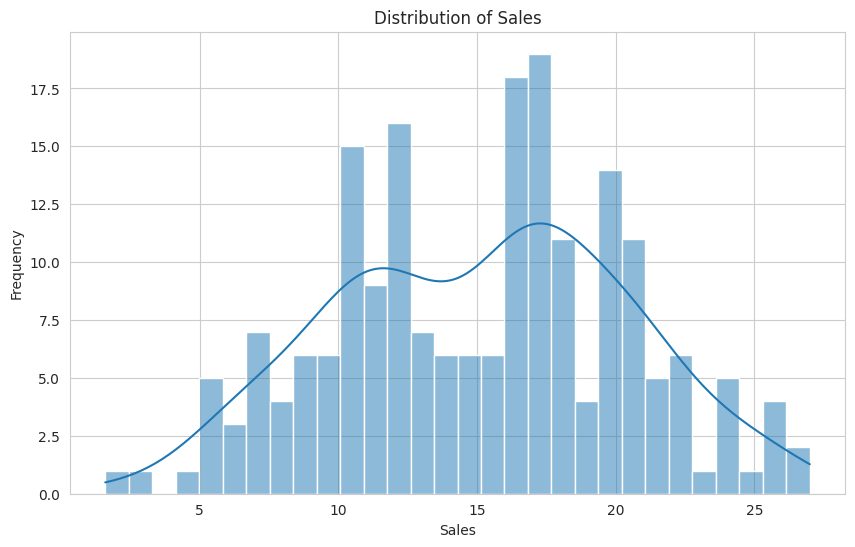

In [10]:
# Plot the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

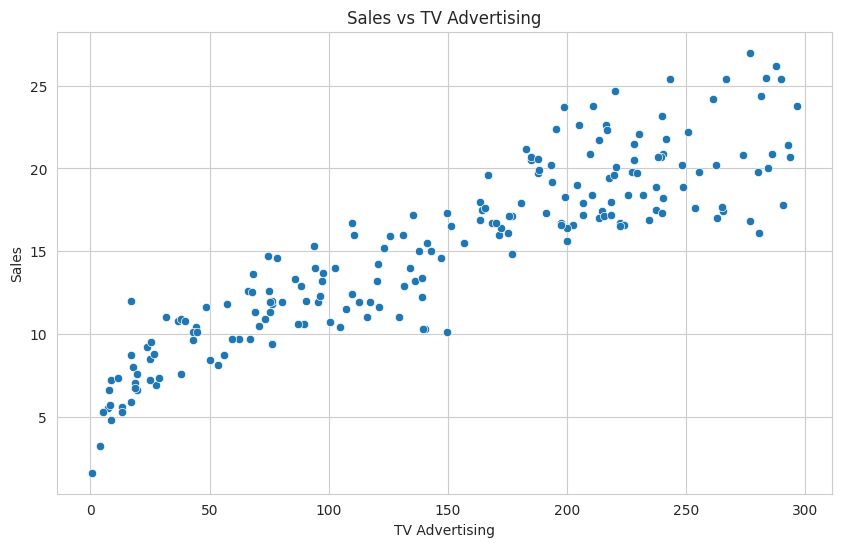

In [11]:
# Scatter plot to see the relationship between TV advertising and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Sales vs TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()

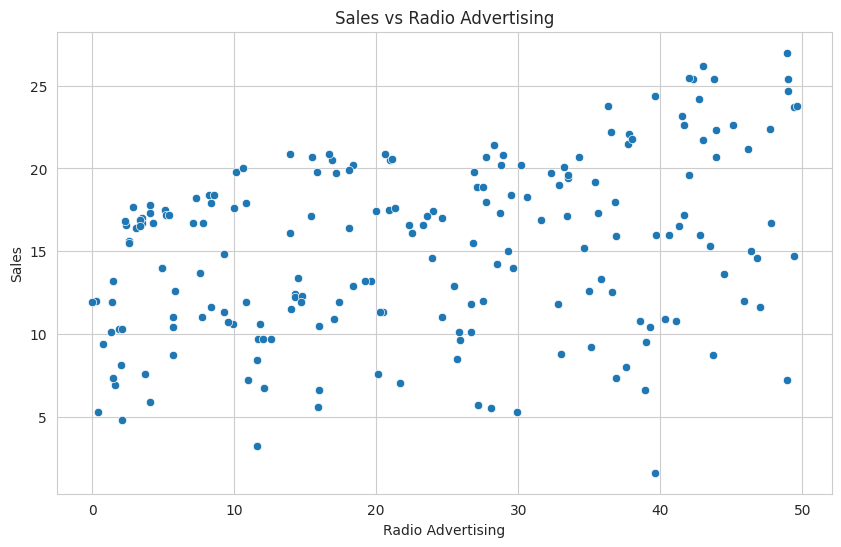

In [12]:
# Scatter plot to see the relationship between Radio advertising and sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Sales vs Radio Advertising')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.show()

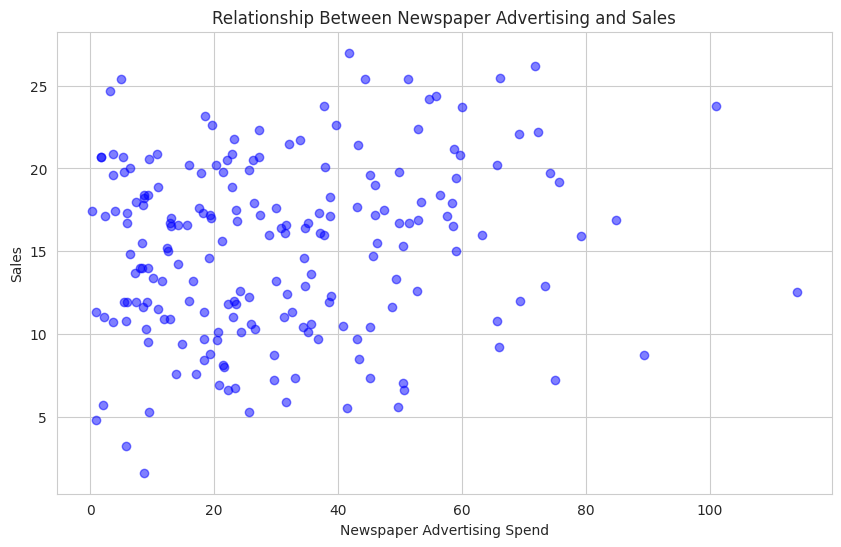

In [13]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Newspaper'], df['Sales'], color='blue', alpha=0.5)

# Add title and labels
plt.title('Relationship Between Newspaper Advertising and Sales')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')

# Show plot
plt.show()

In [18]:
# Model Building
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826
Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]


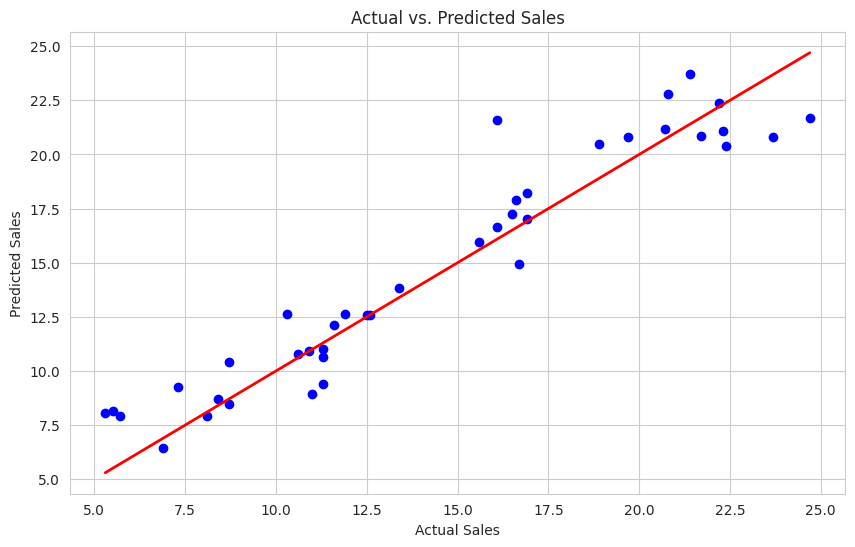

In [20]:
# Plotting actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

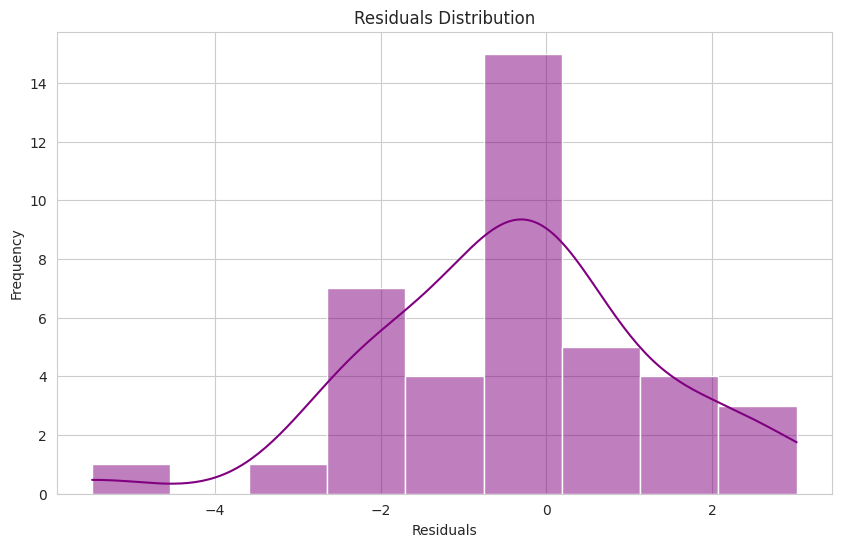

In [21]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()